# Tutorial 3: Composable Weight and Delay Initialization

**Duration:** 20-25 minutes  
**Level:** Intermediate  
**Prerequisites:** Tutorial 1, basic understanding of distributions

## Learning Objectives

By the end of this tutorial, you will:
- Use different weight distributions (Normal, LogNormal, Gamma, etc.)
- Use different delay distributions (Uniform, Normal, Gamma)
- Compose initializers with arithmetic operations (+, -, *, /)
- Apply transformations (clip, scale, add)
- Create distance-dependent parameters
- Build complex initialization pipelines

## 1. Setup and Imports

In [1]:
import numpy as np
import brainunit as u
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from braintools.conn import Random, Ring, DistanceModulated, ExcitatoryInhibitory
from braintools.init import LogNormal, Uniform, Beta, Exponential, Gamma, TruncatedNormal, Constant, Normal
import braintools.visualize as visualize

# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Random seed for reproducibility
rng = np.random.default_rng(42)

print("Environment ready!")

Environment ready!


## 2. Introduction to Composable Initialization

### Why Composable?

In braintools.conn, weight and delay initializers are **objects** that can be:
- Combined with arithmetic operations (`+`, `-`, `*`, `/`)
- Transformed with methods (`.clip()`, `.add()`, `.multiply()`)
- Piped together with `|` operator
- Composed into complex pipelines

This allows you to build complex initialization strategies from simple building blocks!

### Basic Pattern:
```python
# Simple
weight = NormalWeight(1.0 * u.nS, 0.2 * u.nS)

# Composed
weight = (NormalWeight(1.0 * u.nS, 0.2 * u.nS) * 2.0 + 0.1 * u.nS).clip(0 * u.nS, 5 * u.nS)
```

## 3. Weight Distributions

Let's explore the available weight distributions and their biological relevance.

### 3.1 Basic Distributions

In [2]:
# Create different weight distributions
n_samples = 10000

# 1. Constant Weight
const_weight = conn.ConstantWeight(1.0 * u.nS)
const_samples = const_weight(rng, n_samples)

# 2. Uniform Weight
uniform_weight = conn.UniformWeight(0.5 * u.nS, 1.5 * u.nS)
uniform_samples = uniform_weight(rng, n_samples)

# 3. Normal Weight
normal_weight = conn.NormalWeight(1.0 * u.nS, 0.3 * u.nS)
normal_samples = normal_weight(rng, n_samples)

# 4. Log-Normal Weight (most biologically realistic)
lognormal_weight = conn.LogNormalWeight(1.0 * u.nS, 0.5 * u.nS)
lognormal_samples = lognormal_weight(rng, n_samples)

print("Weight Distributions Generated:")
print(f"  Constant: {const_samples.mean():.3f} ± {const_samples.std():.3f}")
print(f"  Uniform: {uniform_samples.mean():.3f} ± {uniform_samples.std():.3f}")
print(f"  Normal: {normal_samples.mean():.3f} ± {normal_samples.std():.3f}")
print(f"  Log-Normal: {lognormal_samples.mean():.3f} ± {lognormal_samples.std():.3f}")

Weight Distributions Generated:
  Constant: 1.000 * nsiemens ± 0.000 * nsiemens
  Uniform: 0.997 * nsiemens ± 0.288 * nsiemens
  Normal: 1.004 * nsiemens ± 0.301 * nsiemens
  Log-Normal: 1.011 * nsiemens ± 0.508 * nsiemens


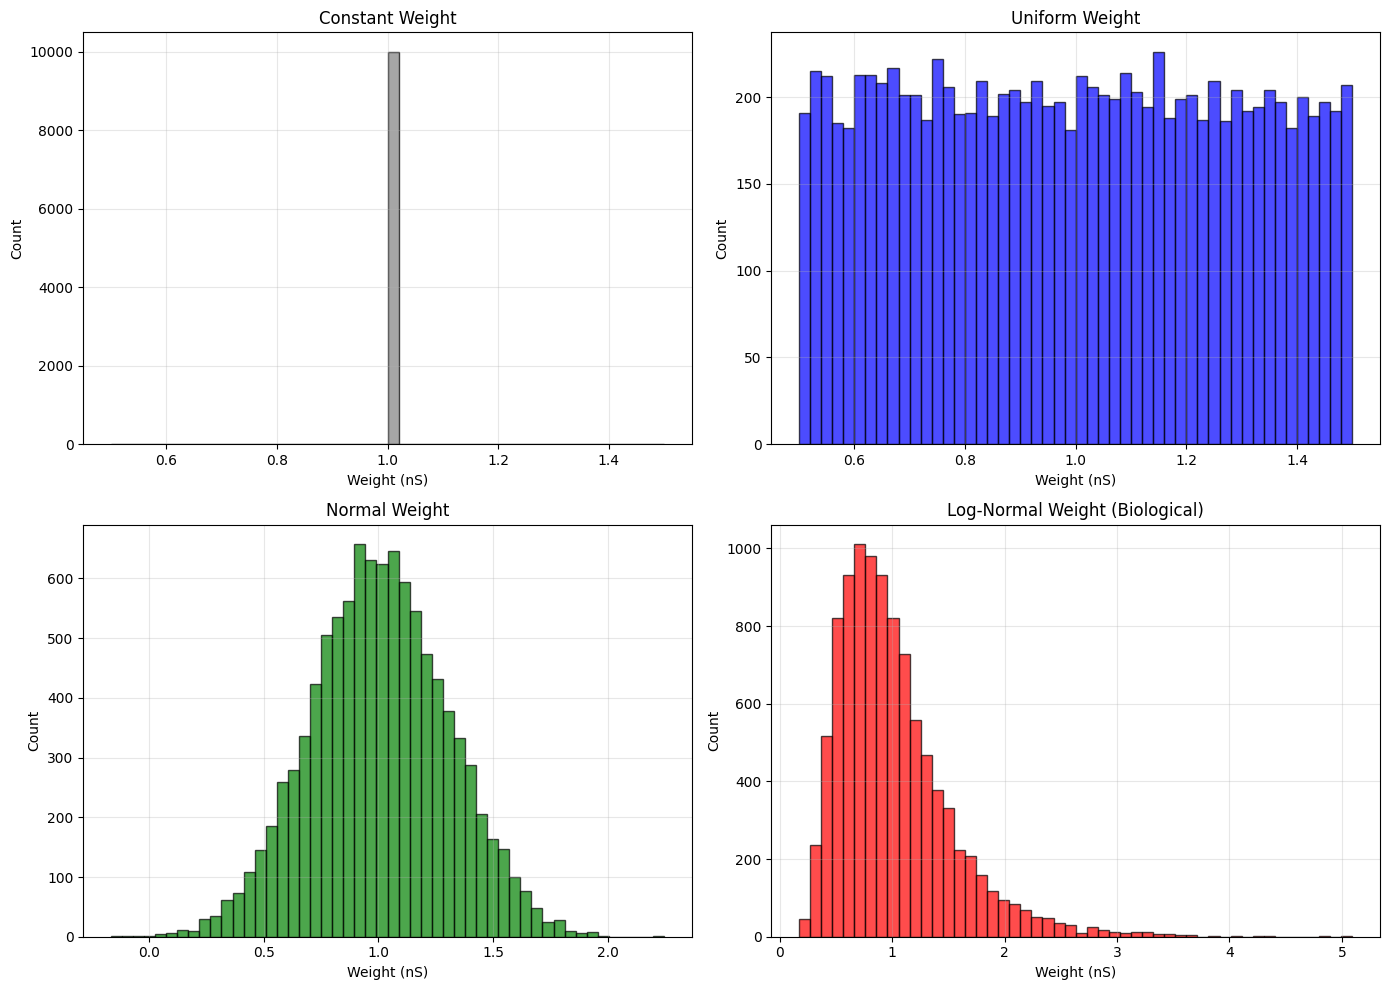

In [3]:
# Visualize weight distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(const_samples.to(u.nS).mantissa, bins=50, color='gray', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Weight (nS)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Constant Weight')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(uniform_samples.to(u.nS).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Weight (nS)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Uniform Weight')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(normal_samples.to(u.nS).mantissa, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Weight (nS)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Normal Weight')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(lognormal_samples.to(u.nS).mantissa, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Weight (nS)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Log-Normal Weight (Biological)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Advanced Weight Distributions

In [4]:
# 1. Gamma Weight
gamma_weight = conn.GammaWeight(shape=2.0, scale=0.5 * u.nS)
gamma_samples = gamma_weight(rng, n_samples)

# 2. Exponential Weight
exp_weight = conn.ExponentialWeight(scale=0.8 * u.nS)
exp_samples = exp_weight(rng, n_samples)

# 3. Beta Weight (bounded)
beta_weight = conn.BetaWeight(alpha=2.0, beta=5.0, low=0.0 * u.nS, high=2.0 * u.nS)
beta_samples = beta_weight(rng, n_samples)

# 4. Truncated Normal Weight
trunc_weight = conn.TruncatedNormalWeight(
    mean=1.0 * u.nS,
    std=0.3 * u.nS,
    low=0.2 * u.nS,
    high=2.0 * u.nS
)
trunc_samples = trunc_weight(rng, n_samples)

print("Advanced Distributions:")
print(f"  Gamma: {gamma_samples.mean():.3f} ± {gamma_samples.std():.3f}")
print(f"  Exponential: {exp_samples.mean():.3f} ± {exp_samples.std():.3f}")
print(f"  Beta: {beta_samples.mean():.3f} ± {beta_samples.std():.3f}")
print(f"  Truncated Normal: {trunc_samples.mean():.3f} ± {trunc_samples.std():.3f}")

Advanced Distributions:
  Gamma: 0.995 * nsiemens ± 0.711 * nsiemens
  Exponential: 0.802 * nsiemens ± 0.802 * nsiemens
  Beta: 0.570 * nsiemens ± 0.321 * nsiemens
  Truncated Normal: 1.000 * nsiemens ± 0.294 * nsiemens


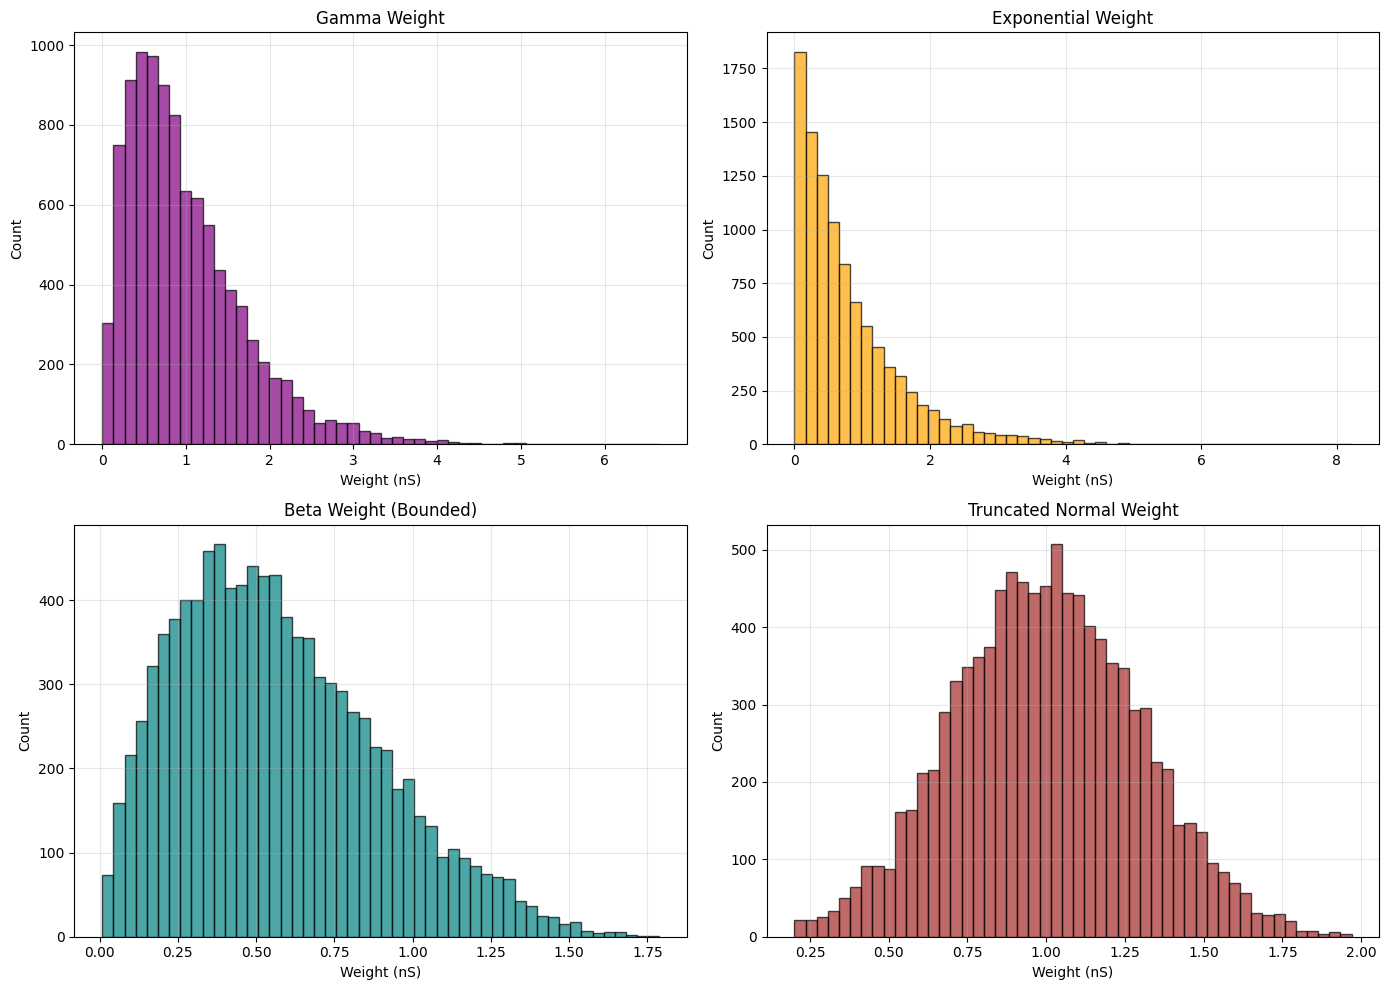

In [5]:
# Visualize advanced distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(gamma_samples.to(u.nS).mantissa, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Weight (nS)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Gamma Weight')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(exp_samples.to(u.nS).mantissa, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Weight (nS)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Exponential Weight')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(beta_samples.to(u.nS).mantissa, bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Weight (nS)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Beta Weight (Bounded)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(trunc_samples.to(u.nS).mantissa, bins=50, color='brown', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Weight (nS)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Truncated Normal Weight')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Delay Distributions

Delays represent the time it takes for a signal to travel from one neuron to another.

### 4.1 Basic Delay Distributions

In [6]:
# 1. Constant Delay
const_delay = Constant(1.0 * u.ms)
const_delay_samples = const_delay(rng, n_samples)

# 2. Uniform Delay
uniform_delay = Uniform(0.5 * u.ms, 2.0 * u.ms)
uniform_delay_samples = uniform_delay(rng, n_samples)

# 3. Normal Delay (with minimum)
normal_delay = Normal(mean=1.5 * u.ms, std=0.3 * u.ms, min_delay=0.1 * u.ms)
normal_delay_samples = normal_delay(rng, n_samples)

# 4. Gamma Delay
gamma_delay = Gamma(shape=2.0, scale=0.5 * u.ms)
gamma_delay_samples = gamma_delay(rng, n_samples)

print("Delay Distributions:")
print(f"  Constant: {const_delay_samples.mean():.3f}")
print(f"  Uniform: {uniform_delay_samples.mean():.3f}")
print(f"  Normal: {normal_delay_samples.mean():.3f}")
print(f"  Gamma: {gamma_delay_samples.mean():.3f}")

Delay Distributions:
  Constant: 1.000 * msecond
  Uniform: 1.253 * msecond
  Normal: 1.500 * msecond
  Gamma: 1.007 * msecond


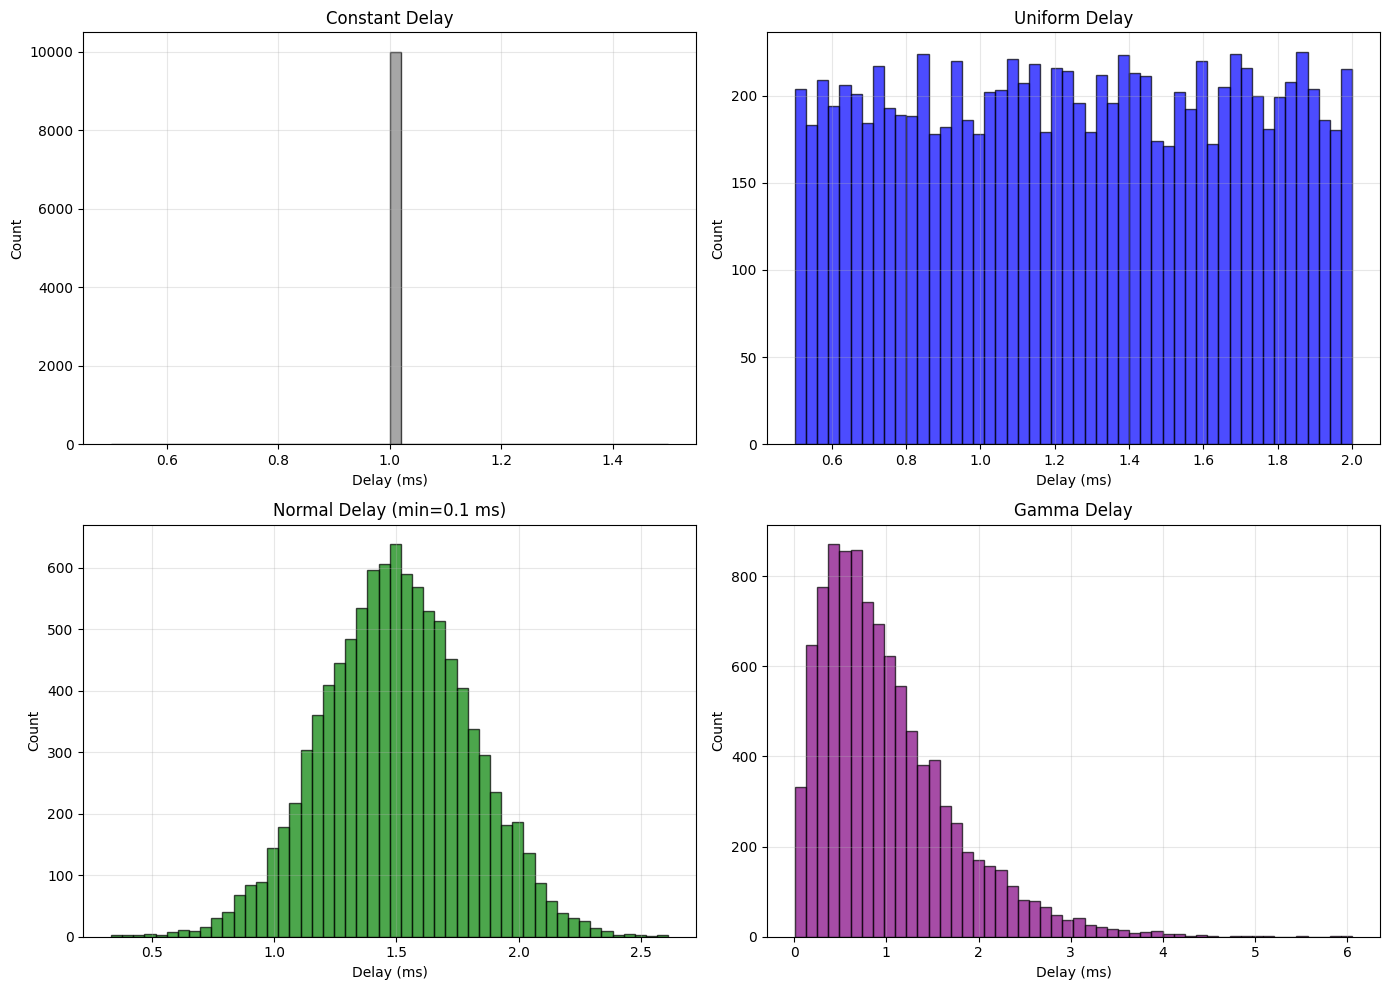

In [7]:
# Visualize delay distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(const_delay_samples.to(u.ms).mantissa, bins=50, color='gray', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Delay (ms)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Constant Delay')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(uniform_delay_samples.to(u.ms).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Delay (ms)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Uniform Delay')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(normal_delay_samples.to(u.ms).mantissa, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Delay (ms)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Normal Delay (min=0.1 ms)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(gamma_delay_samples.to(u.ms).mantissa, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Delay (ms)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gamma Delay')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Arithmetic Operations

The real power of composable initialization comes from combining initializers with arithmetic operations.

### 5.1 Addition and Subtraction

In [8]:
# Base distribution
base = Normal(1.0 * u.nS, 0.2 * u.nS)
base_samples = base(rng, n_samples)

# Add a constant offset
added = base + 0.5 * u.nS
added_samples = added(rng, n_samples)

# Subtract a constant
subtracted = base - 0.2 * u.nS
subtracted_samples = subtracted(rng, n_samples)

# Combine two distributions
base2 = Uniform(0.2 * u.nS, 0.8 * u.nS)
combined = base + base2
combined_samples = combined(rng, n_samples)

print("Arithmetic Operations:")
print(f"  Base: {base_samples.mean():.3f} ± {base_samples.std():.3f}")
print(f"  Base + 0.5: {added_samples.mean():.3f} ± {added_samples.std():.3f}")
print(f"  Base - 0.2: {subtracted_samples.mean():.3f} ± {subtracted_samples.std():.3f}")
print(f"  Base + Uniform: {combined_samples.mean():.3f} ± {combined_samples.std():.3f}")

Arithmetic Operations:
  Base: 1.001 * nsiemens ± 0.199 * nsiemens
  Base + 0.5: 1.502 * nsiemens ± 0.199 * nsiemens
  Base - 0.2: 0.805 * nsiemens ± 0.200 * nsiemens
  Base + Uniform: 1.500 * nsiemens ± 0.265 * nsiemens


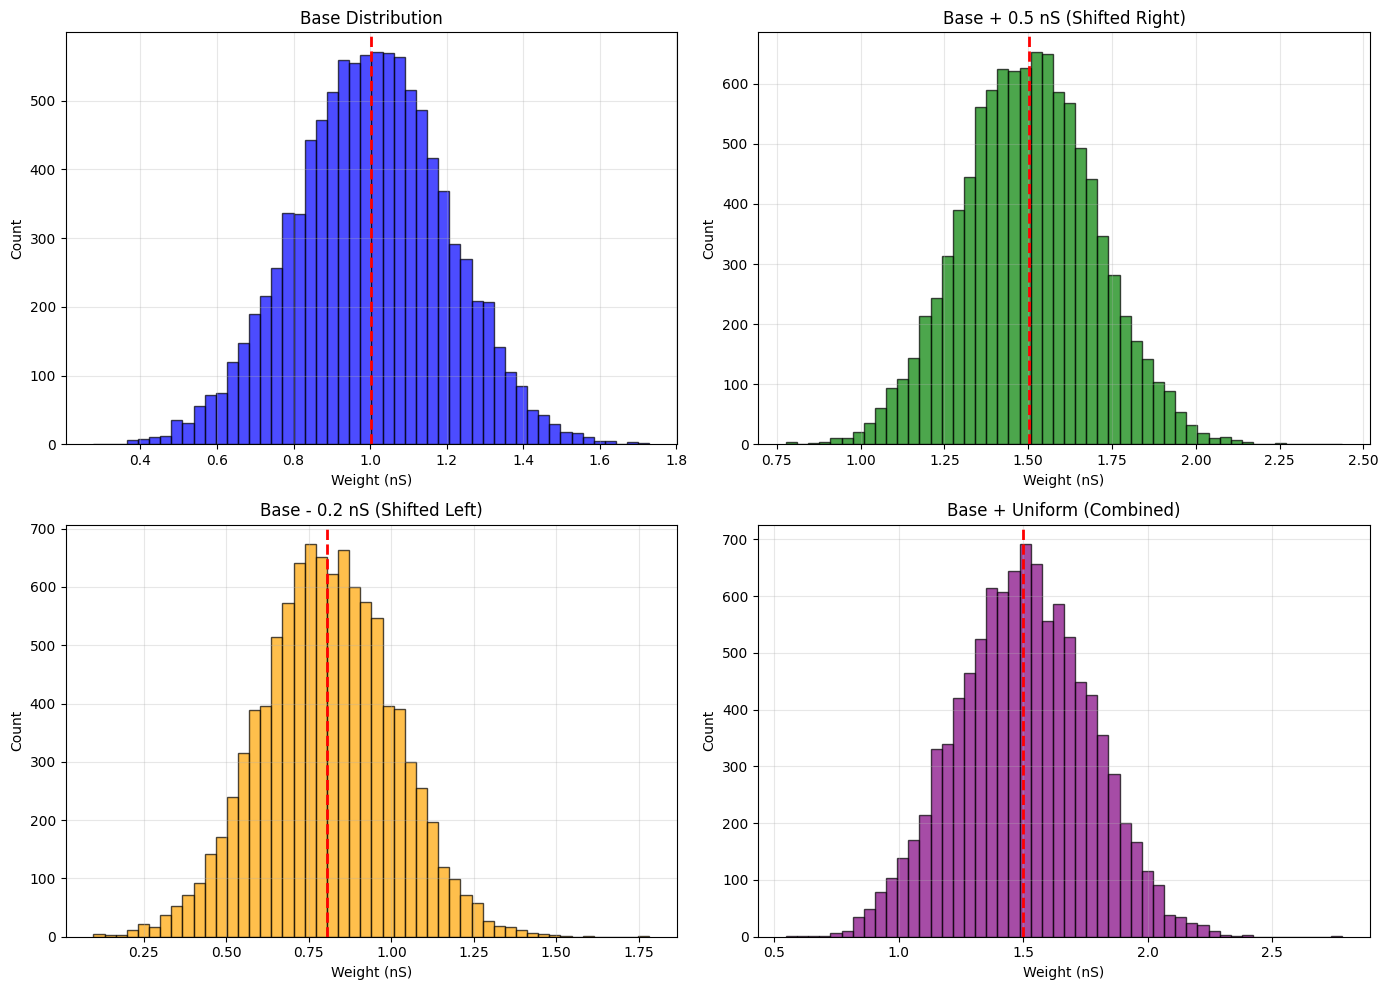

In [9]:
# Visualize arithmetic operations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(base_samples.to(u.nS).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black', label='Original')
axes[0, 0].axvline(base_samples.mean().to(u.nS).mantissa, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Weight (nS)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Base Distribution')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(added_samples.to(u.nS).mantissa, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(added_samples.mean().to(u.nS).mantissa, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Weight (nS)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Base + 0.5 nS (Shifted Right)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(subtracted_samples.to(u.nS).mantissa, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(subtracted_samples.mean().to(u.nS).mantissa, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Weight (nS)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Base - 0.2 nS (Shifted Left)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(combined_samples.to(u.nS).mantissa, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(combined_samples.mean().to(u.nS).mantissa, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Weight (nS)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Base + Uniform (Combined)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2 Multiplication and Division

In [10]:
# Base distribution
base = Uniform(0.5 * u.nS, 1.5 * u.nS)
base_samples = base(rng, n_samples)

# Multiply by a scalar
scaled_up = base * 2.0
scaled_up_samples = scaled_up(rng, n_samples)

# Divide by a scalar
scaled_down = base / 2.0
scaled_down_samples = scaled_down(rng, n_samples)

# Multiply two distributions
multiplier = Normal(1.0 * u.nS, 0.2 * u.nS)
product = base * multiplier
product_samples = product(rng, n_samples)

print("Scaling Operations:")
print(f"  Base: {base_samples.mean():.3f} ± {base_samples.std():.3f}")
print(f"  Base × 2: {scaled_up_samples.mean():.3f} ± {scaled_up_samples.std():.3f}")
print(f"  Base / 2: {scaled_down_samples.mean():.3f} ± {scaled_down_samples.std():.3f}")
print(f"  Base × Normal: {product_samples.mean():.3f} ± {product_samples.std():.3f}")

Scaling Operations:
  Base: 1.003 * nsiemens ± 0.289 * nsiemens
  Base × 2: 2.006 * nsiemens ± 0.576 * nsiemens
  Base / 2: 0.500 * nsiemens ± 0.145 * nsiemens
  Base × Normal: 1.003 * nsiemens2 ± 0.359 * nsiemens2


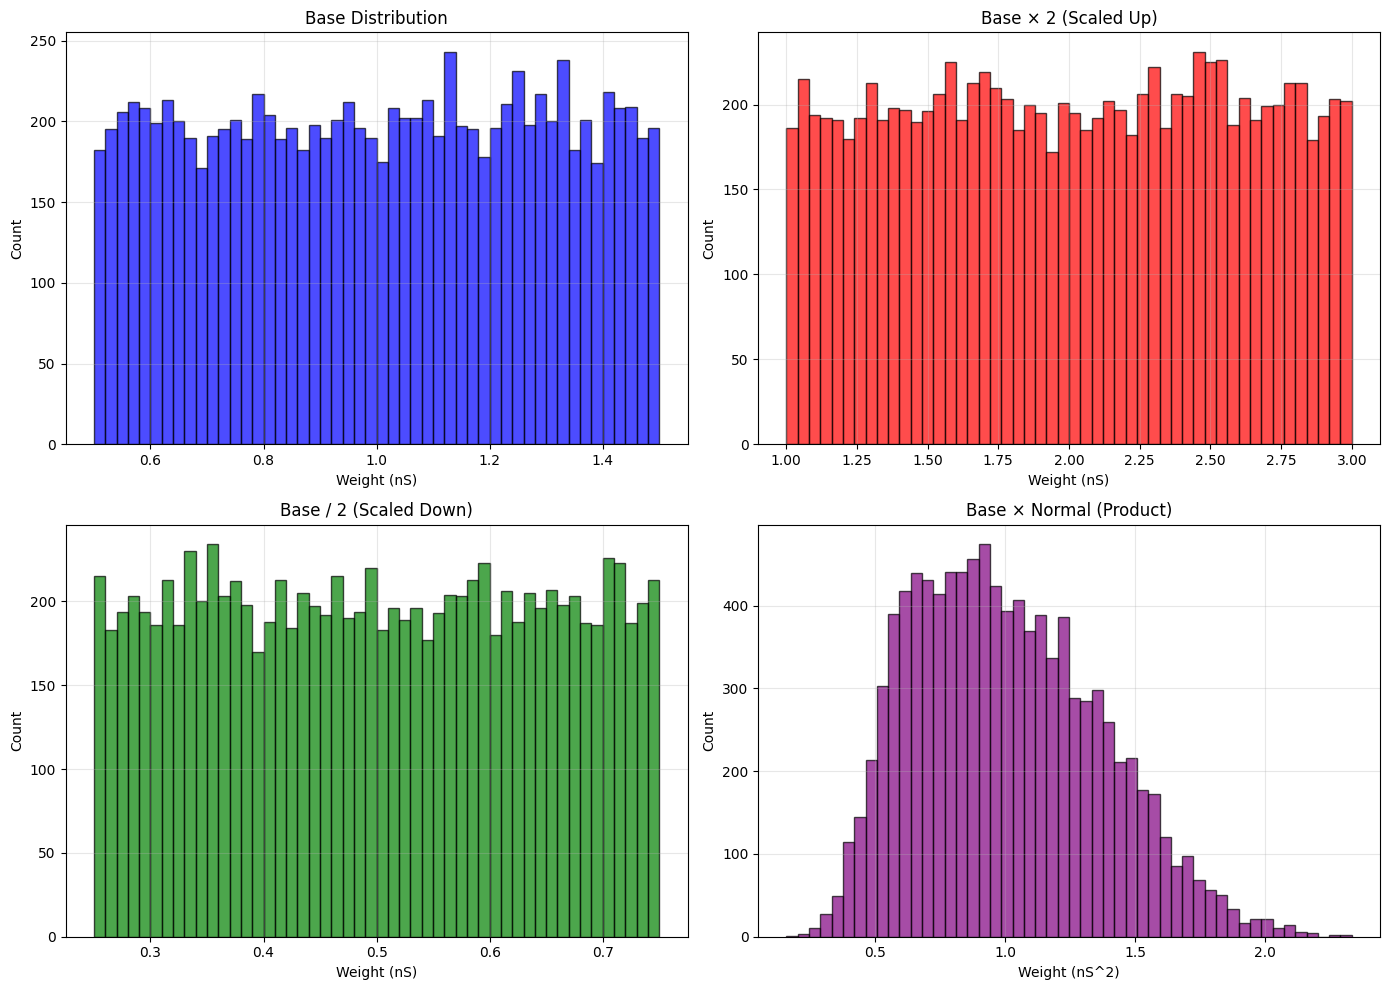

In [11]:
# Visualize scaling operations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(base_samples.to(u.nS).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Weight (nS)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Base Distribution')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(scaled_up_samples.to(u.nS).mantissa, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Weight (nS)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Base × 2 (Scaled Up)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(scaled_down_samples.to(u.nS).mantissa, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Weight (nS)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Base / 2 (Scaled Down)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(product_samples.to(u.nS**2).mantissa, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Weight (nS^2)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Base × Normal (Product)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Transformation Methods

Initializers have built-in transformation methods for common operations.

### 6.1 Clipping

In [12]:
# Create a wide distribution
wide = Normal(1.0 * u.nS, 0.8 * u.nS)
wide_samples = wide(rng, n_samples)

# Clip to a range
clipped = wide.clip(min_val=0.2 * u.nS, max_val=2.0 * u.nS)
clipped_samples = clipped(rng, n_samples)

# Clip only minimum
clipped_min = wide.clip(min_val=0.5 * u.nS)
clipped_min_samples = clipped_min(rng, n_samples)

# Clip only maximum
clipped_max = wide.clip(max_val=1.5 * u.nS)
clipped_max_samples = clipped_max(rng, n_samples)

print("Clipping Operations:")
print(f"  Original: [{wide_samples.min():.3f}, {wide_samples.max():.3f}]")
print(f"  Clipped [0.2, 2.0]: [{clipped_samples.min():.3f}, {clipped_samples.max():.3f}]")
print(f"  Clipped min=0.5: [{clipped_min_samples.min():.3f}, {clipped_min_samples.max():.3f}]")
print(f"  Clipped max=1.5: [{clipped_max_samples.min():.3f}, {clipped_max_samples.max():.3f}]")

Clipping Operations:
  Original: [-2.068 * nsiemens, 4.194 * nsiemens]
  Clipped [0.2, 2.0]: [0.200 * nsiemens, 2.000 * nsiemens]
  Clipped min=0.5: [0.500 * nsiemens, 3.990 * nsiemens]
  Clipped max=1.5: [-1.988 * nsiemens, 1.500 * nsiemens]


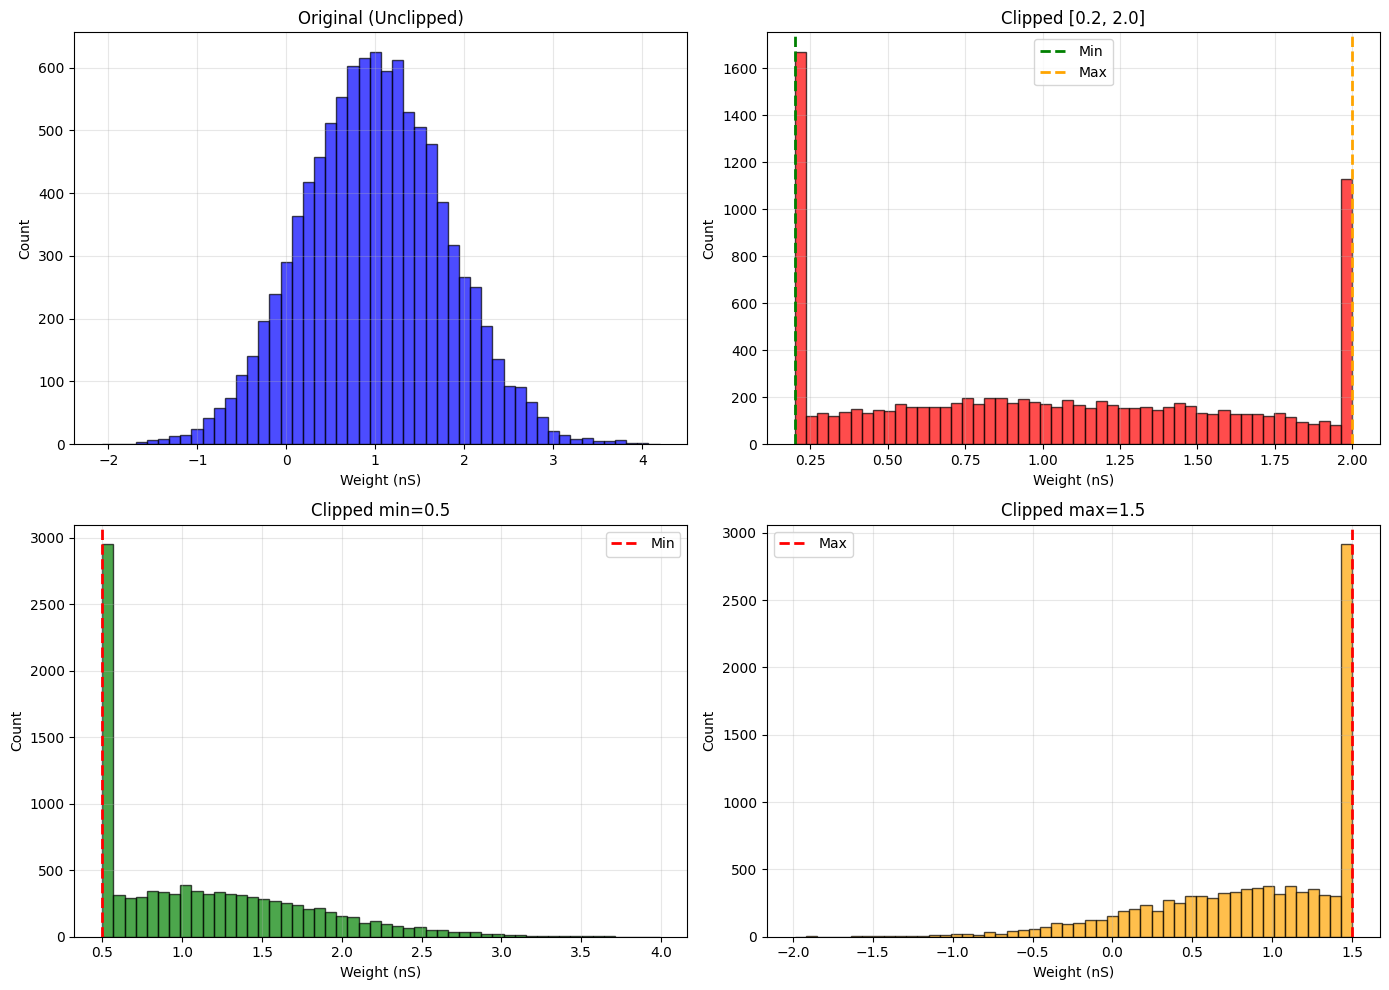

In [13]:
# Visualize clipping
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(wide_samples.to(u.nS).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Weight (nS)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Original (Unclipped)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(clipped_samples.to(u.nS).mantissa, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(0.2, color='green', linestyle='--', linewidth=2, label='Min')
axes[0, 1].axvline(2.0, color='orange', linestyle='--', linewidth=2, label='Max')
axes[0, 1].set_xlabel('Weight (nS)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Clipped [0.2, 2.0]')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(clipped_min_samples.to(u.nS).mantissa, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Min')
axes[1, 0].set_xlabel('Weight (nS)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Clipped min=0.5')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(clipped_max_samples.to(u.nS).mantissa, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(1.5, color='red', linestyle='--', linewidth=2, label='Max')
axes[1, 1].set_xlabel('Weight (nS)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Clipped max=1.5')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Chaining Transformations

In [14]:
# Complex transformation pipeline
base = Normal(1.0 * u.nS, 0.3 * u.nS)

# Chain multiple operations
transformed = (
    base
    .multiply(2.0)              # Scale up
    .add(0.5 * u.nS)            # Add offset
    .clip(0.5 * u.nS, 3.0 * u.nS)  # Bound the range
)

base_samples = base(rng, n_samples)
transformed_samples = transformed(rng, n_samples)

print("Transformation Pipeline:")
print(f"  Original: {base_samples.mean():.3f} ± {base_samples.std():.3f}")
print(f"  After (×2 + 0.5, clipped [0.5, 3.0]): {transformed_samples.mean():.3f} ± {transformed_samples.std():.3f}")
print(f"  Range: [{transformed_samples.min():.3f}, {transformed_samples.max():.3f}]")

Transformation Pipeline:
  Original: 0.997 * nsiemens ± 0.299 * nsiemens
  After (×2 + 0.5, clipped [0.5, 3.0]): 2.434 * nsiemens ± 0.506 * nsiemens
  Range: [0.500 * nsiemens, 3.000 * nsiemens]


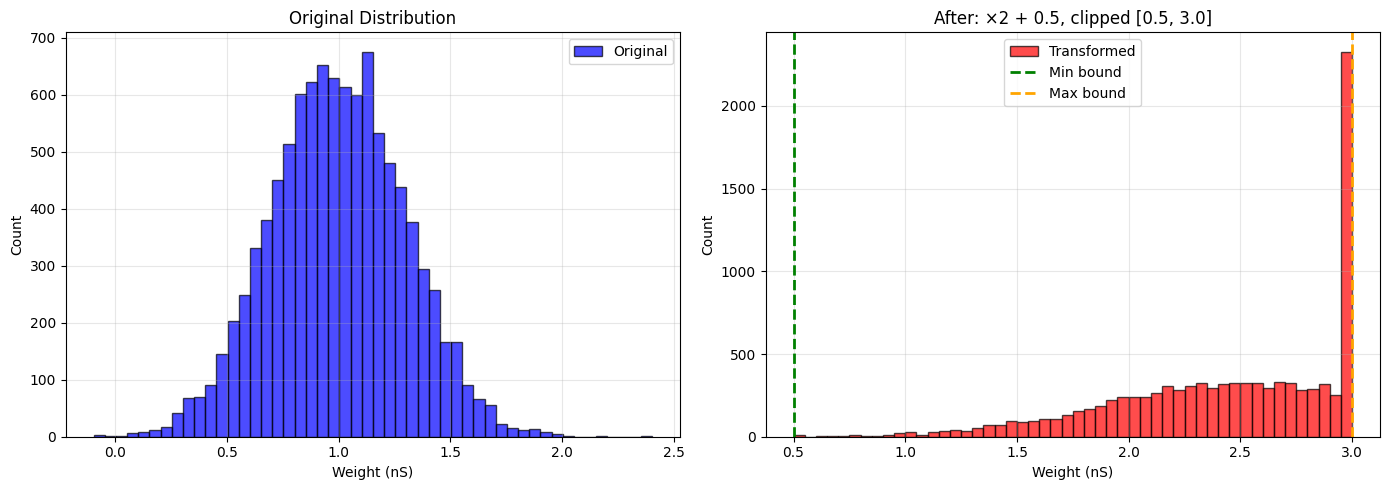

In [15]:
# Visualize transformation pipeline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(base_samples.to(u.nS).mantissa, bins=50, color='blue', alpha=0.7, edgecolor='black', label='Original')
ax1.set_xlabel('Weight (nS)')
ax1.set_ylabel('Count')
ax1.set_title('Original Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(transformed_samples.to(u.nS).mantissa, bins=50, color='red', alpha=0.7, edgecolor='black', label='Transformed')
ax2.axvline(0.5, color='green', linestyle='--', linewidth=2, label='Min bound')
ax2.axvline(3.0, color='orange', linestyle='--', linewidth=2, label='Max bound')
ax2.set_xlabel('Weight (nS)')
ax2.set_ylabel('Count')
ax2.set_title('After: ×2 + 0.5, clipped [0.5, 3.0]')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Distance-Based Initialization

One of the most powerful features is creating parameters that depend on spatial distance between neurons.

### 7.1 Distance-Modulated Weights

In [16]:
# Create positions for neurons in 2D space
n_neurons = 100
positions = np.random.uniform(0, 100, (n_neurons, 2)) * u.um

# Distance-modulated weight: starts with base distribution, modulated by distance
dist_weight = DistanceModulated(
    base_dist=Normal(2.0 * u.nS, 0.4 * u.nS),
    distance_profile='exponential',  # exp(-d/sigma)
    sigma=30.0 * u.um,
    min_weight=0.1 * u.nS
)

# Create connectivity to get distances
spatial_conn = Random(
    prob=0.15,
    weight=dist_weight,
    delay=Constant(1.0 * u.ms),
    seed=42
)

spatial_result = spatial_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions,
    rng=rng
)

print("Distance-Modulated Weights:")
print(f"  Connections: {spatial_result.n_connections}")
print(f"  Weight range: [{spatial_result.weights.min():.3f}, {spatial_result.weights.max():.3f}]")
print(f"  Mean weight: {spatial_result.weights.mean():.3f}")

Distance-Modulated Weights:
  Connections: 1515
  Weight range: [0.465 * nsiemens, 3.351 * nsiemens]
  Mean weight: 2.008 * nsiemens


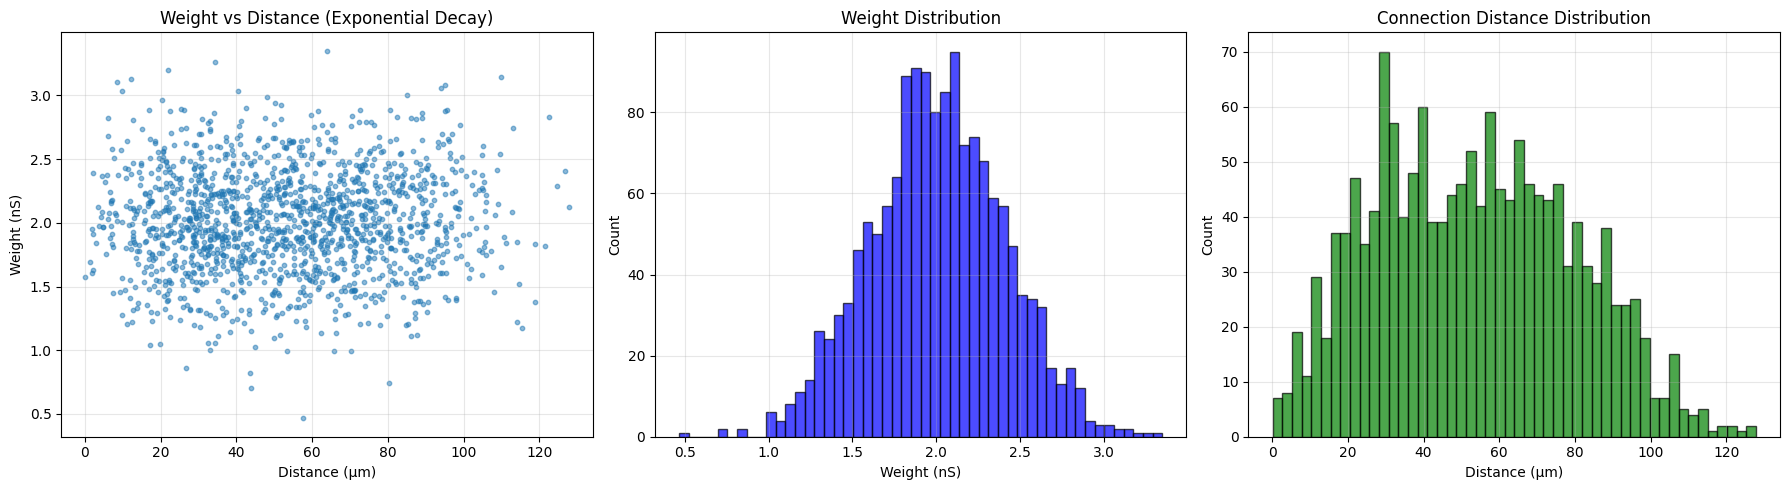

In [17]:
# Analyze distance vs weight relationship
distances = spatial_result.get_distances().to(u.um).mantissa
weights = spatial_result.weights.to(u.nS).mantissa

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: distance vs weight
axes[0].scatter(distances, weights, alpha=0.5, s=10)
axes[0].set_xlabel('Distance (μm)')
axes[0].set_ylabel('Weight (nS)')
axes[0].set_title('Weight vs Distance (Exponential Decay)')
axes[0].grid(True, alpha=0.3)

# Weight distribution
axes[1].hist(weights, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Weight (nS)')
axes[1].set_ylabel('Count')
axes[1].set_title('Weight Distribution')
axes[1].grid(True, alpha=0.3)

# Distance distribution
axes[2].hist(distances, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Distance (μm)')
axes[2].set_ylabel('Count')
axes[2].set_title('Connection Distance Distribution')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Different Distance Profiles

In [18]:
# Compare different distance profiles
profiles = ['exponential', 'gaussian', 'linear']
profile_results = []

for profile in profiles:
    dist_w = DistanceModulated(
        base_dist=Constant(2.0 * u.nS),
        distance_profile=profile,
        sigma=30.0 * u.um,
        min_weight=0.1 * u.nS
    )
    
    conn_pattern = Random(
        prob=0.15,
        weight=dist_w,
        seed=42
    )
    
    result = conn_pattern(
        pre_size=n_neurons,
        post_size=n_neurons,
        pre_positions=positions,
        post_positions=positions,
        rng=rng
    )
    
    profile_results.append(result)

print("Distance Profiles Comparison:")
for i, profile in enumerate(profiles):
    print(f"  {profile}: mean weight = {profile_results[i].weights.mean():.3f}")

Distance Profiles Comparison:
  exponential: mean weight = 2.000 * nsiemens
  gaussian: mean weight = 2.000 * nsiemens
  linear: mean weight = 2.000 * nsiemens


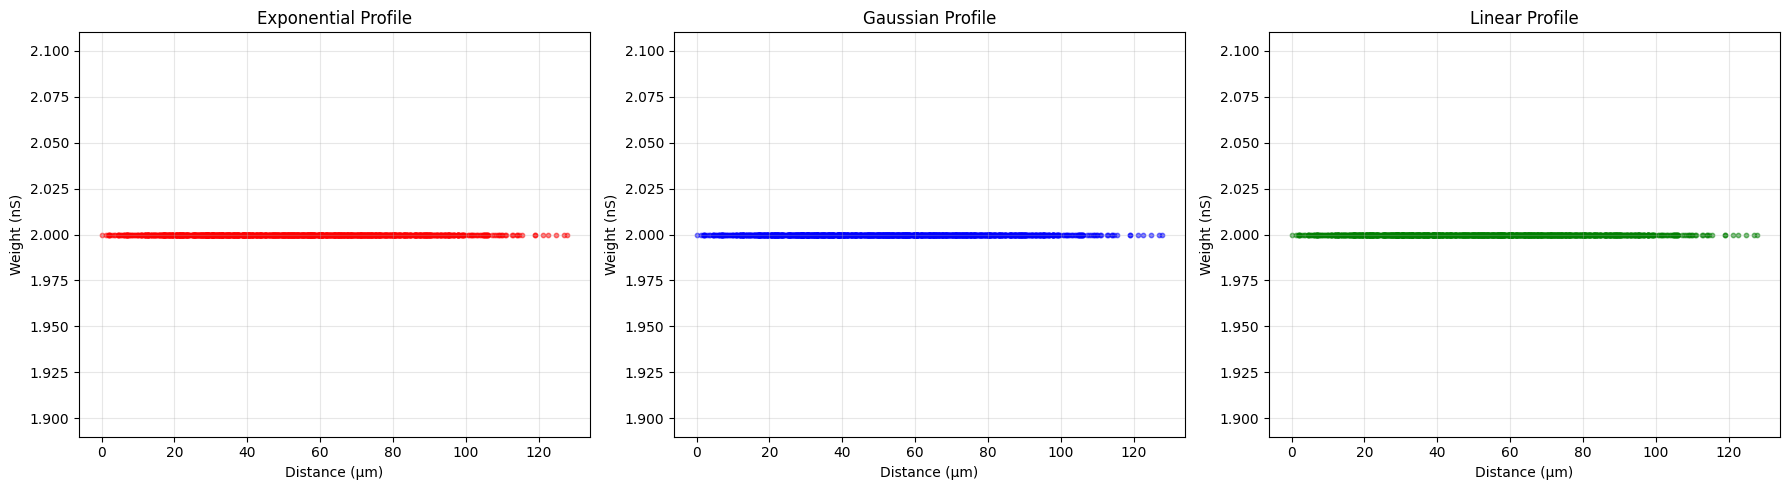

In [19]:
# Visualize different distance profiles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = ['red', 'blue', 'green']
for i, (profile, result) in enumerate(zip(profiles, profile_results)):
    dist = result.get_distances().to(u.um).mantissa
    w = result.weights.to(u.nS).mantissa
    
    axes[i].scatter(dist, w, alpha=0.5, s=10, color=colors[i])
    axes[i].set_xlabel('Distance (μm)')
    axes[i].set_ylabel('Weight (nS)')
    axes[i].set_title(f'{profile.capitalize()} Profile')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.3 Distance-Proportional Delays

Model axonal conduction delays based on distance and velocity.

In [20]:
# Realistic axonal conduction velocity: 0.5 m/s for unmyelinated, 5-10 m/s for myelinated
dist_delay = DistanceProportionalDelay(
    base_delay=0.5 * u.ms,  # Synaptic delay
    velocity=1.0 * u.meter / u.second,  # Unmyelinated axon
    max_delay=10.0 * u.ms
)

realistic_conn = Random(
    prob=0.15,
    weight=LogNormal(1.0 * u.nS, 0.3 * u.nS),
    delay=dist_delay,
    seed=42
)

realistic_result = realistic_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions,
    rng=rng
)

print("Distance-Proportional Delays:")
print(f"  Velocity: 1.0 m/s")
print(f"  Base delay: 0.5 ms")
print(f"  Delay range: [{realistic_result.delays.min():.3f}, {realistic_result.delays.max():.3f}]")
print(f"  Mean delay: {realistic_result.delays.mean():.3f}")

Distance-Proportional Delays:
  Velocity: 1.0 m/s
  Base delay: 0.5 ms
  Delay range: [0.500 * msecond, 0.500 * msecond]
  Mean delay: 0.500 * msecond


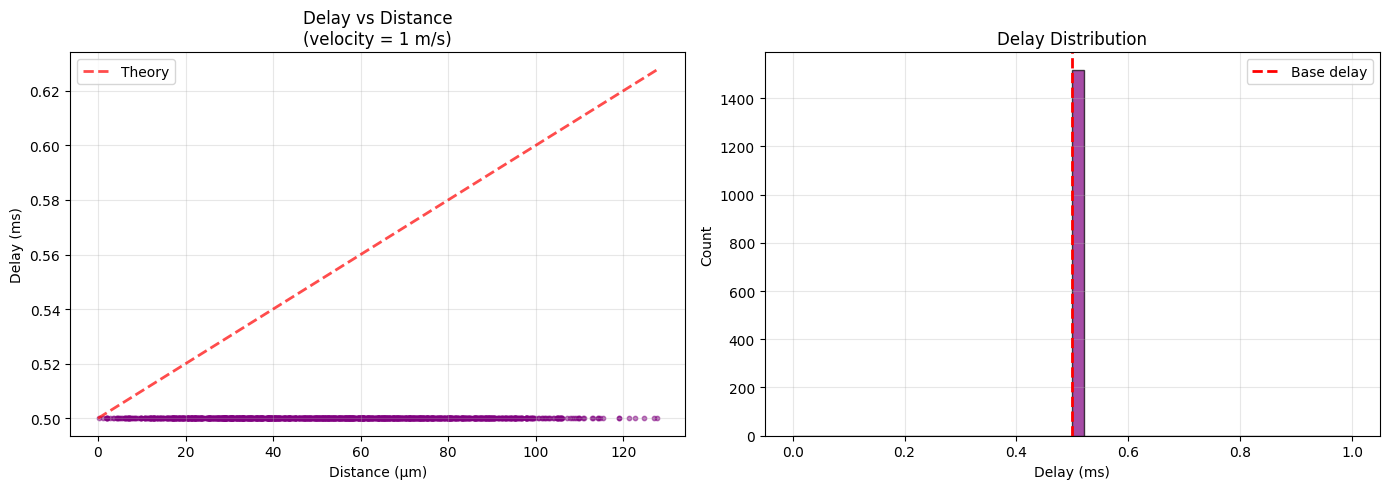

In [21]:
# Visualize distance vs delay relationship
distances = realistic_result.get_distances().to(u.um).mantissa
delays = realistic_result.delays.to(u.ms).mantissa

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(distances, delays, alpha=0.5, s=10, color='purple')
axes[0].set_xlabel('Distance (μm)')
axes[0].set_ylabel('Delay (ms)')
axes[0].set_title('Delay vs Distance\n(velocity = 1 m/s)')
axes[0].grid(True, alpha=0.3)

# Theoretical line
theory_dist = np.linspace(0, distances.max(), 100)
theory_delay = 0.5 + theory_dist * 1e-6 / 1.0 * 1000  # Convert to ms
axes[0].plot(theory_dist, theory_delay, 'r--', linewidth=2, label='Theory', alpha=0.7)
axes[0].legend()

# Delay histogram
axes[1].hist(delays, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Base delay')
axes[1].set_xlabel('Delay (ms)')
axes[1].set_ylabel('Count')
axes[1].set_title('Delay Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Advanced Composition: Pipe Operator

The pipe operator `|` allows functional-style composition.

In [22]:
# Using pipe operator for transformations
piped_init = (
    Normal(1.0 * u.nS, 0.3 * u.nS)
    | (lambda x: u.math.maximum(x, 0.1 * u.nS))  # Ensure minimum
    | (lambda x: x * 1.5)                         # Scale up
)

piped_samples = piped_init(rng, n_samples)

print("Piped Initialization:")
print(f"  Mean: {piped_samples.mean():.3f}")
print(f"  Range: [{piped_samples.min():.3f}, {piped_samples.max():.3f}]")

Piped Initialization:
  Mean: 1.495 * nsiemens
  Range: [0.150 * nsiemens, 3.084 * nsiemens]


## 9. Example Project: Complex E-I Network with Spatial Structure

Let's combine everything we've learned to create a sophisticated network.

In [23]:
# Network parameters
N_total = 500
N_exc = 400
N_inh = 100

# Create spatial layout
all_positions = np.random.uniform(0, 200, (N_total, 2)) * u.um

# Excitatory weights: log-normal with distance decay
exc_weight = DistanceModulated(
    base_dist=LogNormal(1.2 * u.nS, 0.4 * u.nS),
    distance_profile='exponential',
    sigma=50.0 * u.um,
    min_weight=0.1 * u.nS
)

# Inhibitory weights: stronger, less distance-dependent
inh_weight = DistanceModulated(
    base_dist=LogNormal(3.0 * u.nS, 0.8 * u.nS),
    distance_profile='gaussian',
    sigma=80.0 * u.um,
    min_weight=0.2 * u.nS
)

# Distance-dependent delays
exc_delay = DistanceProportionalDelay(
    base_delay=0.8 * u.ms,
    velocity=2.0 * u.meter / u.second,  # Faster (myelinated)
    max_delay=8.0 * u.ms
)

inh_delay = DistanceProportionalDelay(
    base_delay=0.5 * u.ms,
    velocity=1.0 * u.meter / u.second,  # Slower (unmyelinated)
    max_delay=5.0 * u.ms
)

# Create E-I network
complex_network = ExcitatoryInhibitory(
    exc_ratio=0.8,
    exc_prob=0.08,
    inh_prob=0.15,
    exc_weight=exc_weight,
    inh_weight=inh_weight,
    delay=exc_delay,
    seed=42
)

complex_result = complex_network(
    pre_size=N_total,
    post_size=N_total,
    pre_positions=all_positions,
    post_positions=all_positions,
    rng=rng
)

print("Complex Spatial E-I Network:")
print(f"  Total neurons: {N_total}")
print(f"  Connections: {complex_result.n_connections}")
print(f"  Sparsity: {1 - complex_result.n_connections/(N_total*N_total):.2%}")

Complex Spatial E-I Network:
  Total neurons: 500
  Connections: 23518
  Sparsity: 90.59%


In [24]:
# Comprehensive analysis
exc_mask = complex_result.pre_indices < N_exc
inh_mask = complex_result.pre_indices >= N_exc

exc_weights = complex_result.weights[exc_mask].to(u.nS).mantissa
inh_weights = complex_result.weights[inh_mask].to(u.nS).mantissa
exc_delays = complex_result.delays[exc_mask].to(u.ms).mantissa
inh_delays = complex_result.delays[inh_mask].to(u.ms).mantissa

exc_distances = complex_result.get_distances()[exc_mask].to(u.um).mantissa
inh_distances = complex_result.get_distances()[inh_mask].to(u.um).mantissa

print("\nExcitatory Connections:")
print(f"  Count: {exc_mask.sum()}")
print(f"  Weight: {exc_weights.mean():.3f} ± {exc_weights.std():.3f} nS")
print(f"  Delay: {exc_delays.mean():.3f} ± {exc_delays.std():.3f} ms")
print(f"  Distance: {exc_distances.mean():.1f} ± {exc_distances.std():.1f} μm")

print("\nInhibitory Connections:")
print(f"  Count: {inh_mask.sum()}")
print(f"  Weight: {inh_weights.mean():.3f} ± {inh_weights.std():.3f} nS")
print(f"  Delay: {inh_delays.mean():.3f} ± {inh_delays.std():.3f} ms")
print(f"  Distance: {inh_distances.mean():.1f} ± {inh_distances.std():.1f} μm")


Excitatory Connections:
  Count: 15981
  Weight: 1.197 ± 0.401 nS
  Delay: 0.800 ± 0.000 ms
  Distance: 103.0 ± 49.7 μm

Inhibitory Connections:
  Count: 7537
  Weight: 2.997 ± 0.785 nS
  Delay: 0.800 ± 0.000 ms
  Distance: 106.3 ± 51.2 μm


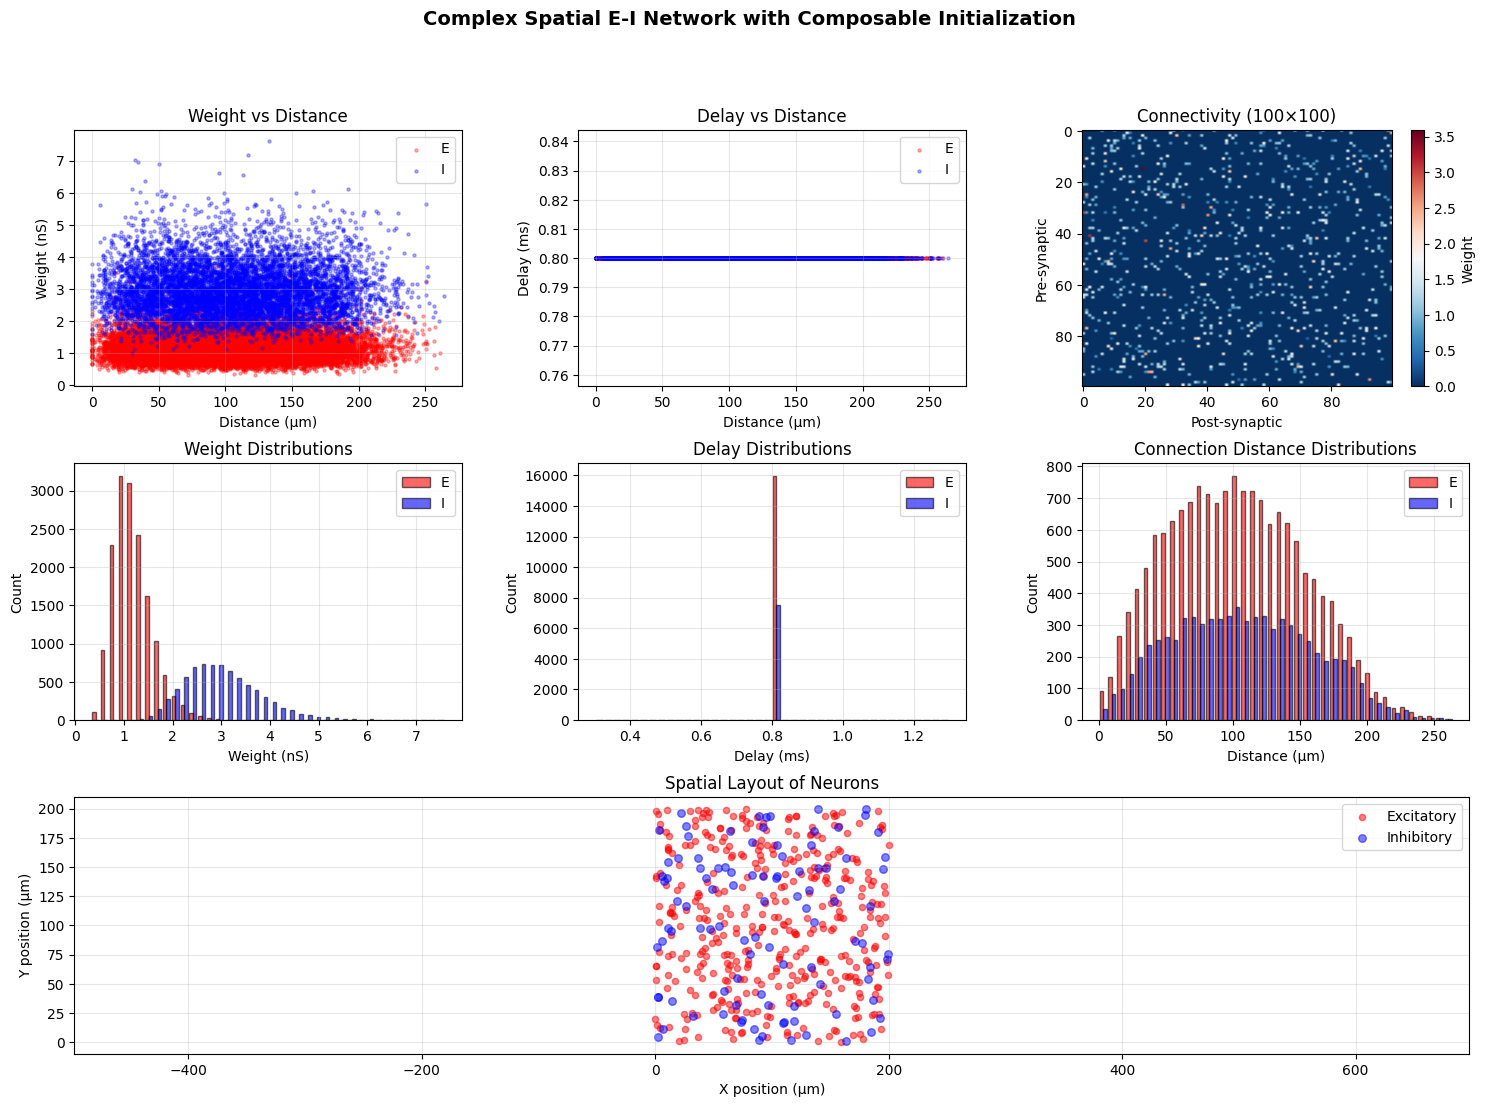

In [25]:
# Comprehensive visualization
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Weight vs Distance (E and I)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(exc_distances, exc_weights, alpha=0.3, s=5, color='red', label='E')
ax1.scatter(inh_distances, inh_weights, alpha=0.3, s=5, color='blue', label='I')
ax1.set_xlabel('Distance (μm)')
ax1.set_ylabel('Weight (nS)')
ax1.set_title('Weight vs Distance')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Delay vs Distance (E and I)
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(exc_distances, exc_delays, alpha=0.3, s=5, color='red', label='E')
ax2.scatter(inh_distances, inh_delays, alpha=0.3, s=5, color='blue', label='I')
ax2.set_xlabel('Distance (μm)')
ax2.set_ylabel('Delay (ms)')
ax2.set_title('Delay vs Distance')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Connectivity matrix
ax3 = fig.add_subplot(gs[0, 2])
subset_size = 100
subset_matrix = complex_result.weight2dense()[:subset_size, :subset_size]
visualize.connectivity_matrix(
    u.get_magnitude(subset_matrix),
    cmap='RdBu_r',
    center_zero=False,
    ax=ax3,
    title=f'Connectivity ({subset_size}×{subset_size})'
)

# 4. Weight distributions
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist([exc_weights, inh_weights], bins=40, label=['E', 'I'],
         color=['red', 'blue'], alpha=0.6, edgecolor='black')
ax4.set_xlabel('Weight (nS)')
ax4.set_ylabel('Count')
ax4.set_title('Weight Distributions')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Delay distributions
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist([exc_delays, inh_delays], bins=40, label=['E', 'I'],
         color=['red', 'blue'], alpha=0.6, edgecolor='black')
ax5.set_xlabel('Delay (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Delay Distributions')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Distance distributions
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist([exc_distances, inh_distances], bins=40, label=['E', 'I'],
         color=['red', 'blue'], alpha=0.6, edgecolor='black')
ax6.set_xlabel('Distance (μm)')
ax6.set_ylabel('Count')
ax6.set_title('Connection Distance Distributions')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Spatial layout
ax7 = fig.add_subplot(gs[2, :])
exc_pos = all_positions[:N_exc].to(u.um).mantissa
inh_pos = all_positions[N_exc:].to(u.um).mantissa
ax7.scatter(exc_pos[:, 0], exc_pos[:, 1], c='red', alpha=0.5, s=20, label='Excitatory')
ax7.scatter(inh_pos[:, 0], inh_pos[:, 1], c='blue', alpha=0.5, s=30, label='Inhibitory')
ax7.set_xlabel('X position (μm)')
ax7.set_ylabel('Y position (μm)')
ax7.set_title('Spatial Layout of Neurons')
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.axis('equal')

plt.suptitle('Complex Spatial E-I Network with Composable Initialization', fontsize=14, fontweight='bold')
plt.show()

## 10. Summary and Key Takeaways

### What We Learned:

1. **Weight Distributions**:
   - Basic: Constant, Uniform, Normal
   - Biological: LogNormal (most realistic)
   - Advanced: Gamma, Exponential, Beta, Truncated Normal

2. **Delay Distributions**:
   - Constant, Uniform, Normal, Gamma
   - Distance-proportional delays (conduction velocity)

3. **Arithmetic Operations**:
   - `+`, `-`: Add/subtract offsets or combine distributions
   - `*`, `/`: Scale distributions

4. **Transformation Methods**:
   - `.clip(min, max)`: Bound values
   - `.add(value)`: Add offset
   - `.multiply(value)`: Scale
   - `.apply(func)`: Custom transformations
   - `|` operator: Functional composition

5. **Distance-Based**:
   - `DistanceModulated`: Spatial weight decay
   - `DistanceProportionalDelay`: Conduction delays
   - Profiles: exponential, gaussian, linear

6. **Best Practices**:
   - Use log-normal for synaptic weights
   - Model realistic conduction velocities
   - Combine multiple distributions for complexity
   - Always clip to ensure valid ranges

## 11. Practice Exercises

1. Create a weight distribution that:
   - Starts with normal distribution
   - Adds a small constant
   - Multiplies by 2
   - Clips to [0.5, 3.0] nS

2. Build a distance-modulated network where:
   - Weights decay with gaussian profile
   - Delays increase linearly with distance
   - Visualize the relationships

3. Create an E-I network with:
   - Different weight distributions for E and I
   - Distance-dependent parameters
   - Analyze the balance